In [ ]:
from  google.colab import drive  
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/econ4130


Mounted at /content/drive
/content/drive/My Drive/econ4130


In [ ]:
### save and load data using pickle
import pickle
def psave(dataframe, fname):
    with open('{}.pkl'.format(fname),'wb') as pickle_file:
        pickle.dump(dataframe,pickle_file)
        
def pload(fname):
  
  with open('{}.pkl'.format(fname),'rb') as pickle_file:
      dataframe=pickle.load(pickle_file)
      return dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

In [ ]:
X_train=pload('X_train_minmax3')
X_test=pload('X_test_minmax3')
Y_trainT=pload('Y_trainT')
Y_testT=pload('Y_testT')
Y_name=['3M','2Y','5Y','10Y','30Y']
X_testO=pload('X_testO')
X_selected=pload('X_selected2_3')

In [ ]:
mse_score = make_scorer(mean_squared_error, greater_is_better = False)

Rough Gridsearch

In [ ]:
model = SVR()
param_search = {'C' : [0.01,0.1,1,10,100],'gamma' : ['auto','scale'],'degree':[3,8],'epsilon':[0.1,0.3,0.5]}

tscv = TimeSeriesSplit(n_splits=3)
output={}
for i in range(5):
  y=Y_trainT[i]
  name=Y_name[i]
  output[name] = GridSearchCV(estimator=model, cv=tscv,
                        param_grid=param_search,scoring=mse_score)
  output[name].fit(X_train, y)
  print(name,' finished')


3M  finished
2Y  finished
5Y  finished
10Y  finished
30Y  finished


In [ ]:
for i in output:
  print(i,output[i].best_estimator_)

3M SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
2Y SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
5Y SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
10Y SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
30Y SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Refined Gridsearch

In [ ]:
###from the rough gridsearchcv, C= 0.1,10,10,10,10 respectively
d={0:np.linspace(0.05,0.5,50),1:np.linspace(1,50,50),2:np.linspace(1,50,50),3:np.linspace(1,50,50),4:np.linspace(1,50,50)}


tscv = TimeSeriesSplit(n_splits=3)
output2={}
for i in range(5):
  model = SVR()
  param_search = {'C' :d[i],'gamma' : ['auto'],'epsilon':[0.1]}
  y=Y_trainT[i]
  name=Y_name[i]
  output2[name] = GridSearchCV(estimator=model, cv=tscv,
                        param_grid=param_search,scoring=mse_score)
  output2[name].fit(X_train, y)
  print(name,' finished')

3M  finished
2Y  finished
5Y  finished
10Y  finished
30Y  finished


In [ ]:
for i in output2:
  print(i,output2[i].best_estimator_)

3M SVR(C=0.1326530612244898, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto', kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)
2Y SVR(C=12.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
5Y SVR(C=15.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
10Y SVR(C=11.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
30Y SVR(C=4.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


{'3M': 0.16976124622031177, '2Y': 0.0858699963080512, '5Y': 0.01753546117470823, '10Y': 0.013622914409267634, '30Y': 0.017673928822801537}


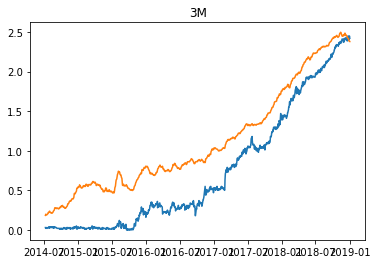

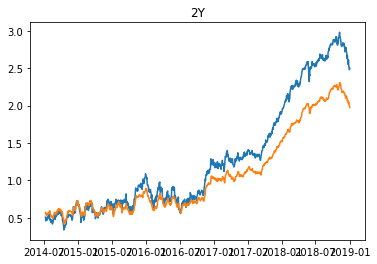

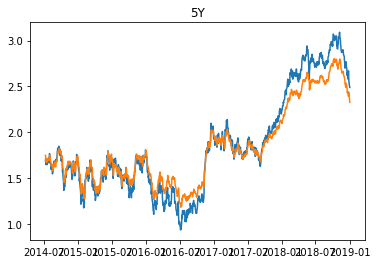

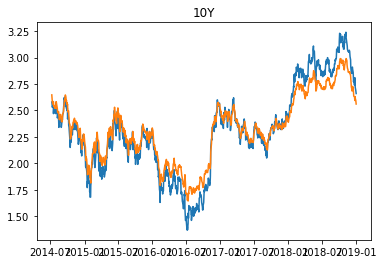

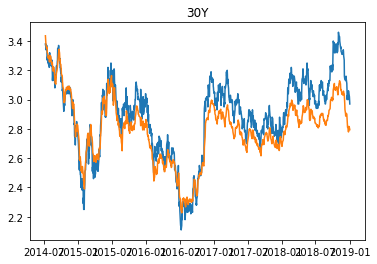

In [ ]:
y_predict={}
error2={}
x=0
for i in output2:
  y=Y_testT[x]
  y_predict[i]=output2[i].best_estimator_.predict(X_test)
  error2[i]=mean_squared_error(y,y_predict[i])
  x+=1
print(error2)
for i in range(5): 
  y=Y_testT[i]
  name=list(output2.keys())[i]
  y_p=y_predict[name]
  plt.figure(i)
  plt.plot(X_testO.index,y)
  plt.plot(X_testO.index,y_p)
  plt.title(name)

  i+=1

In [ ]:
psave(output2,'SVR_gscv_3')

Rough Gridsearch After Feature Selection

In [ ]:
param_search = {'C' : [0.01,0.1,1,10,100],'gamma' : ['auto','scale'],'degree':[3,8],'epsilon':[0.1,0.3,0.5]}
tscv = TimeSeriesSplit(n_splits=5)
output_s={}

for i in range(5):
  model = SVR()
  y=Y_trainT[i]
  name=Y_name[i]
  output_s[name] = GridSearchCV(estimator=model, cv=tscv,
                        param_grid=param_search,scoring=mse_score)
  output_s[name].fit(X_selected[i][0], y)
  print(name,' finished')

3M  finished
2Y  finished
5Y  finished
10Y  finished
30Y  finished


In [ ]:
for i in output_s:
  print(i,output_s[i].best_estimator_)

3M SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
2Y SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
5Y SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
10Y SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
30Y SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Refined Gridsearch After Feature Selection

In [ ]:
###from the rough gridsearchcv, C= 100,1,100,10,10 respectively 
###after setting the '3M' and '10Y' to (75,125,50),125 and 75 was respectively selected, so I used [130,180] and [30,80] here）
d={0:np.linspace(130,180,50),1:np.linspace(0.1,5,50),2:np.linspace(30,80,50),3:np.linspace(1,50,50),4:np.linspace(1,50,50)}


tscv = TimeSeriesSplit(n_splits=5)
output_s2={}
for i in range(5):
  model = SVR()
  param_search = {'C' :d[i],'gamma' : ['auto'],'epsilon':[0.1]}
  y=Y_trainT[i]
  name=Y_name[i]
  output_s2[name] = GridSearchCV(estimator=model, cv=tscv,
                        param_grid=param_search,scoring=mse_score)
  output_s2[name].fit(X_selected[i][0], y)
  print(name,' finished')

3M  finished
2Y  finished
5Y  finished
10Y  finished
30Y  finished


In [ ]:
for i in output_s2:
  print(i,output_s2[i].best_estimator_)
psave(output_s2,'SVR_gscv_FS')

3M SVR(C=177.9591836734694, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto', kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)
2Y SVR(C=1.8000000000000003, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto', kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)
5Y SVR(C=42.244897959183675, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto', kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)
10Y SVR(C=5.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
30Y SVR(C=2.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


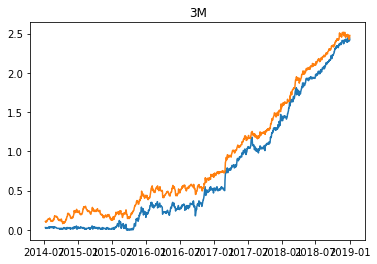

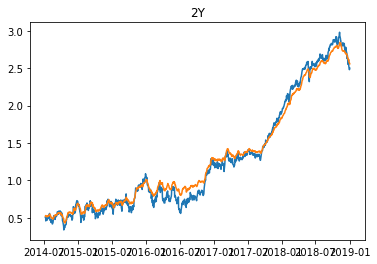

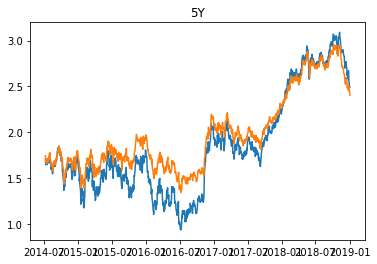

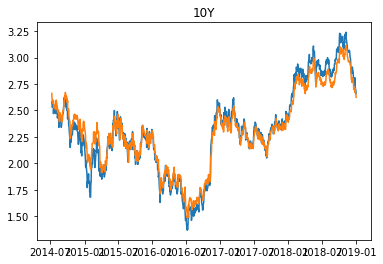

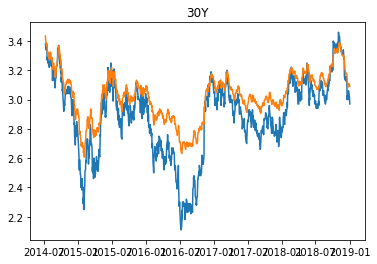

In [ ]:
y_predict={}
error4={}
x=0
for i in output_s2:
  y=Y_testT[x]
  y_predict[i]=output_s2[i].best_estimator_.predict(X_selected[x][1])
  error4[i]=mean_squared_error(y,y_predict[i])
  x+=1

for i in range(5): 
  y=Y_testT[i]
  name=list(output_s2.keys())[i]
  y_p=y_predict[name]
  plt.figure(i)
  plt.plot(X_testO.index,y)
  plt.plot(X_testO.index,y_p)
  plt.title(name)

  i+=1



In [ ]:
psave([error2,error4,'0 have no feature selection; 1 have'],'SVR_MSE_3')

Summary

In [ ]:
SVR_Res=pload('SVR_gscv_3')
SVRFS_Res=pload('SVR_gscv_FS')
#error before Feature slection VS error after
print(error2)
print(error4)

{'3M': 0.16941836480071934, '2Y': 0.0858699963080512, '5Y': 0.01753546117470823, '10Y': 0.013622914409267634, '30Y': 0.017673928822801537}
{'3M': 0.030937543768286505, '2Y': 0.007284976388097189, '5Y': 0.038247901971584855, '10Y': 0.007564890243061224, '30Y': 0.032126585041795976}


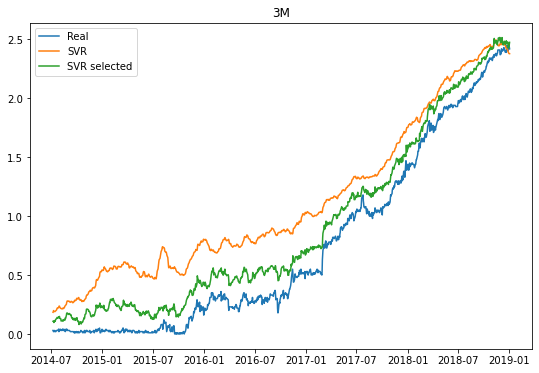

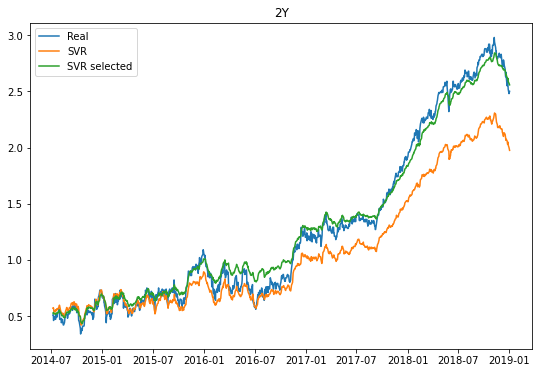

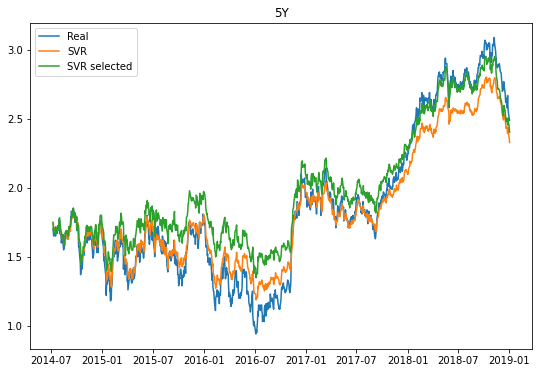

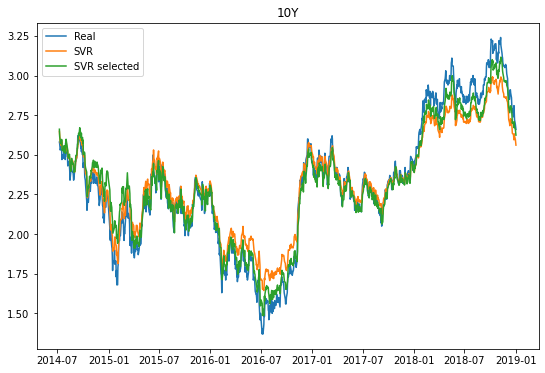

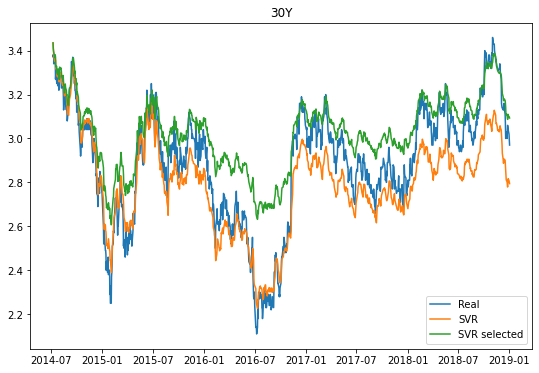

In [ ]:

for i in range(len(Y_name)):
  target=Y_name[i]
  fig= plt.figure(figsize=[9,6])
  plt.plot(X_testO.index,Y_testT[i],label='Real')
  plt.plot(X_testO.index,SVR_Res[target].best_estimator_.predict(X_test),label='SVR')
  plt.plot(X_testO.index,SVRFS_Res[target].best_estimator_.predict(X_selected[i][1]),label='SVR selected')
  plt.title(target)
  plt.legend()
  plt.show()